In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('sales.csv')

In [3]:
df.head(5)

,date,category,value,product,sales,region
0,2024-02-10,Electronics,47.27,NaN,NaN,South
1,NaN,Electronics,1018.28,Toy Car,9.0,North
2,2024-02-07,Clothing,57.36,Office Desk,4.0,South
3,2024-02-02,Toys,49.54,Power Bank,12.0,NaN
4,2024-01-27,Furniture,679.32,Denim Jacket,13.0,North


In [4]:
import seaborn as sns

In [5]:
df = sns.load_dataset("titanic")

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
## check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.shape

(891, 15)

In [9]:
df.dropna().shape

(182, 15)

In [10]:
#coloumn wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values

Imputation is the process of replacing missing (null/NaN) values in your dataset with substitute values, so you can use the data for analysis or machine learning without errors.



1.Mean value imputation

Mean imputation is a method where missing values in a numerical column are replaced with the mean (average) of the non-missing values of that column.

<Axes: xlabel='age', ylabel='Count'>

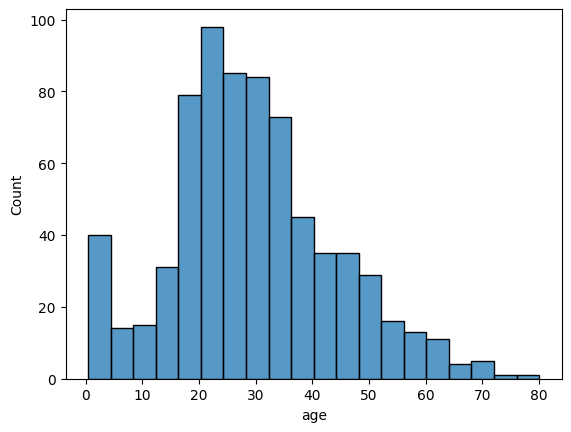

In [11]:
sns.histplot(df['age'])

In [12]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [13]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


^
  Mean imputation works well when we have normally distributed data

2.Median value imputation

Median imputation replaces missing values in a numerical column with the median (middle value) of the non-missing entries.

why it use?

if we have outliers in the dataset





In [14]:
df['age_median']=df['age'].fillna(df['age'].median())

In [15]:
df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


3. Mode imputation technique

Mode Imputation is a data cleaning technique where missing values in a column are filled with the mode — the value that appears most frequently in that column.

why use--Mainly for categorical features (e.g., Gender, City, Department)

 Also used for discrete numerical data with repeating values



In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


In [17]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [18]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

1. df['embarked'].notna()
Returns a Boolean Series: True where 'embarked' is not null, and False where it is NaN.

2. df[df['embarked'].notna()]
Filters the DataFrame to include only rows where 'embarked' is not missing.

3. ['embarked']
Selects the 'embarked' column from the filtered DataFrame.

4. .mode()
Calculates the mode (most frequent value) of the 'embarked' column.

This returns a Series with the most frequent value(s).

5. [0]
Gets the first value of the mode series. Even though mode can return multiple values, here we pick just one (the most common one).

In [20]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [21]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [22]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [23]:
df['embarked'].isnull().sum()

np.int64(2)

## Handling Imbalance Dataset

1. up sampling
2. Down sampling

In [24]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

np.random.seed(123): Ensures the random numbers generated will be the same every time you run the code — great for reproducibility in experiments or models.

You are going to create 1,000 total samples.
class_0_ratio = 0.9 means 90% of the samples will belong to Class 0.

n_class_0 = int(1000 * 0.9) → n_class_0 = 900
So, you’ll have 900 samples for Class 0.

n_class_1 = 1000 - 900 → n_class_1 = 100
The remaining 100 samples will be for Class 1.

Class 0 → 900 samples
Class 1 → 100 samples



In [25]:
n_class_0,n_class_1

(900, 100)

In [26]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [27]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [28]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [29]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

upsampling-- Increasing the number of samples in the minority class by duplicating or generating new synthetic data.

In [30]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

df_minority: All rows where target == 1 (minority class)

df_majority: All rows where target == 0 (majority class)

In [31]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,
         n_samples=len(df_majority),
         random_state=42)

replace=True: Allows the same row to be picked more than once (i.e., with replacement).

n_samples=len(df_majority): You're making the number of samples in the minority class equal to the majority class.

This is upsampling the minority class to balance the dataset.

In [32]:
df_minority_upsampled.shape

(900, 3)

In [33]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

 now i have a balanced dataset: both classes have equal number of samples.



In [34]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

## Down sampling


Reducing the number of samples in the majority class to match the minority class.

In [35]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [36]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False,
         n_samples=len(df_minority),
         random_state=42)

In [37]:
df_majority_downsampled.shape

(100, 3)

In [38]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [39]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE


SMOTE doesn’t just copy — it creates new fake data points for Class 1 using math.

Here’s how:

Pick a Class 1 data point.

Look at its nearest neighbors (other similar Class 1 points).

Draw a line between them.

Add a new point somewhere on that line.

🧬 This creates new, slightly different data, not duplicates.



In [40]:
from sklearn.datasets import make_classification

In [ ]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

n_samples=1000: Create 1000 total rows (data points).

n_features=2: We’ll have only 2 input features (f1 and f2).

n_redundant=0: No extra unnecessary (redundant) features.

n_clusters_per_class=1: One cluster per class for simplicity.

weights=[0.90]: 90% of samples are class 0, and 10% are class 1 — this creates imbalance.

random_state=12: Ensures you get the same result every time (reproducibility).



In [42]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


We're converting the NumPy arrays X and y into DataFrames for easy handling.

Then, we combine features and target columns into a single DataFrame: final_df.



In [43]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

A print of how many samples belong to class 0 vs class 1 — you'll see class 0 has many more.

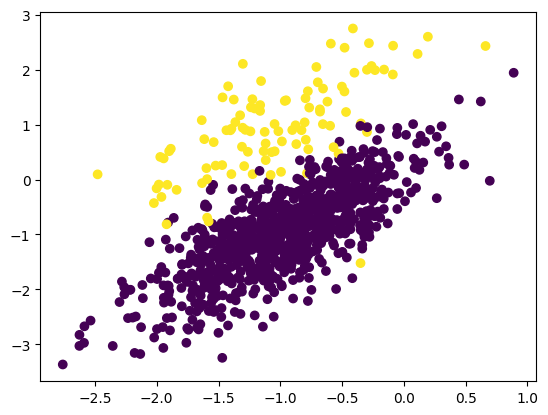

In [44]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

A 2D scatter plot where points are colored based on the class (target) — class imbalance is visually clear.



In [45]:
from imblearn.over_sampling import SMOTE


In [55]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

c:\Users\NILESH\anaconda3\envs\ml-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SMOTE Magic:
SMOTE = Synthetic Minority Over-sampling Technique.

It generates new (synthetic) data points for the minority class by interpolating between existing minority samples.

Result: Classes become balanced — the number of class 1 samples now equals class 0.



In [56]:
X.shape

(1800, 2)

In [57]:
y.shape

(1800,)

In [59]:
len(y[y==0])

900

In [60]:
len(y[y==1])

900

In [61]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

Same as before — convert the resampled arrays into a clean DataFrame to use in ML or visualization.



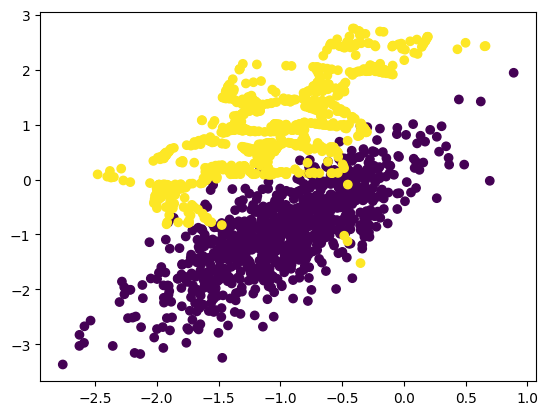

In [62]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

Now the plot will show a balanced distribution — visually you'll see more class 1 points



## Handling outliers

### 5 number summary and box plot

minimum, maximum, median , Q1, Q3 IQR

In [63]:
import numpy as np

In [64]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [65]:
minimum,Q1,median,Q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [66]:

IQR=Q3-Q1
print(IQR)

35.0


In [67]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [68]:
lower_fence

np.float64(1.5)

In [69]:
higher_fence

np.float64(141.5)

In [70]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [71]:
import seaborn as sns

<Axes: >

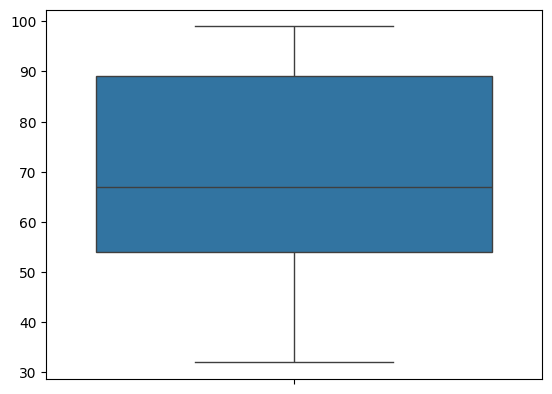

In [72]:
sns.boxplot(lst_marks)

In [73]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

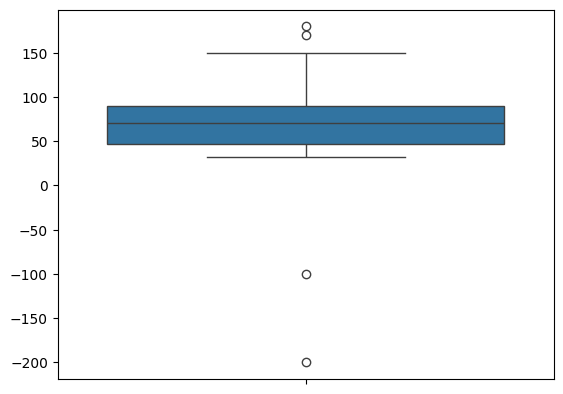

In [74]:
sns.boxplot(lst_marks)

## Data encoding

### Nominal/One hot encoding